# Stock Market Analysis Project

## 1.Change in price of stock overtime

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
%matplotlib inline

#For reading stock data from Yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

#For time stamps
from datetime import datetime

#Tech stocks that will be used in this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

#Set up start and end times
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock,start,end)
    
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company,com_name in zip(company_list,company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list,axis=0)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [2]:
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-09-16,151.210007,151.350006,148.369995,150.699997,149.811264,162278800,APPLE
2022-09-19,149.309998,154.559998,149.100006,154.479996,153.568970,81474200,APPLE
2022-09-20,153.399994,158.080002,153.080002,156.899994,155.974686,107689800,APPLE
2022-09-21,157.339996,158.740005,153.600006,153.720001,152.813461,101696800,APPLE
2022-09-22,152.380005,154.470001,150.910004,152.740005,151.839233,86652500,APPLE
...,...,...,...,...,...,...,...
2023-09-11,138.750000,143.619995,138.639999,143.100006,143.100006,56764500,AMAZON
2023-09-12,142.320007,143.000000,140.610001,141.229996,141.229996,42668500,AMAZON
2023-09-13,140.949997,144.979996,140.869995,144.850006,144.850006,60465200,AMAZON


### Performing Descriptive Statistics

In [3]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,160.853148,162.618367,159.275697,161.030677,160.581982,6.919589e+07
std,19.117302,18.857701,19.351765,19.079774,19.262481,2.386441e+07
min,126.010002,127.769997,124.169998,125.019997,124.488876,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.274216,5.127550e+07
50%,156.080002,158.080002,154.149994,156.899994,155.974686,6.421830e+07
75%,177.540001,179.415001,176.560005,177.504997,177.504997,8.073500e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


### Information About the Data

In [4]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-09-16 to 2023-09-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          251 non-null    float64
 1   High          251 non-null    float64
 2   Low           251 non-null    float64
 3   Close         251 non-null    float64
 4   Adj Close     251 non-null    float64
 5   Volume        251 non-null    int64  
 6   company_name  251 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.7+ KB


### Closing Price Analysis

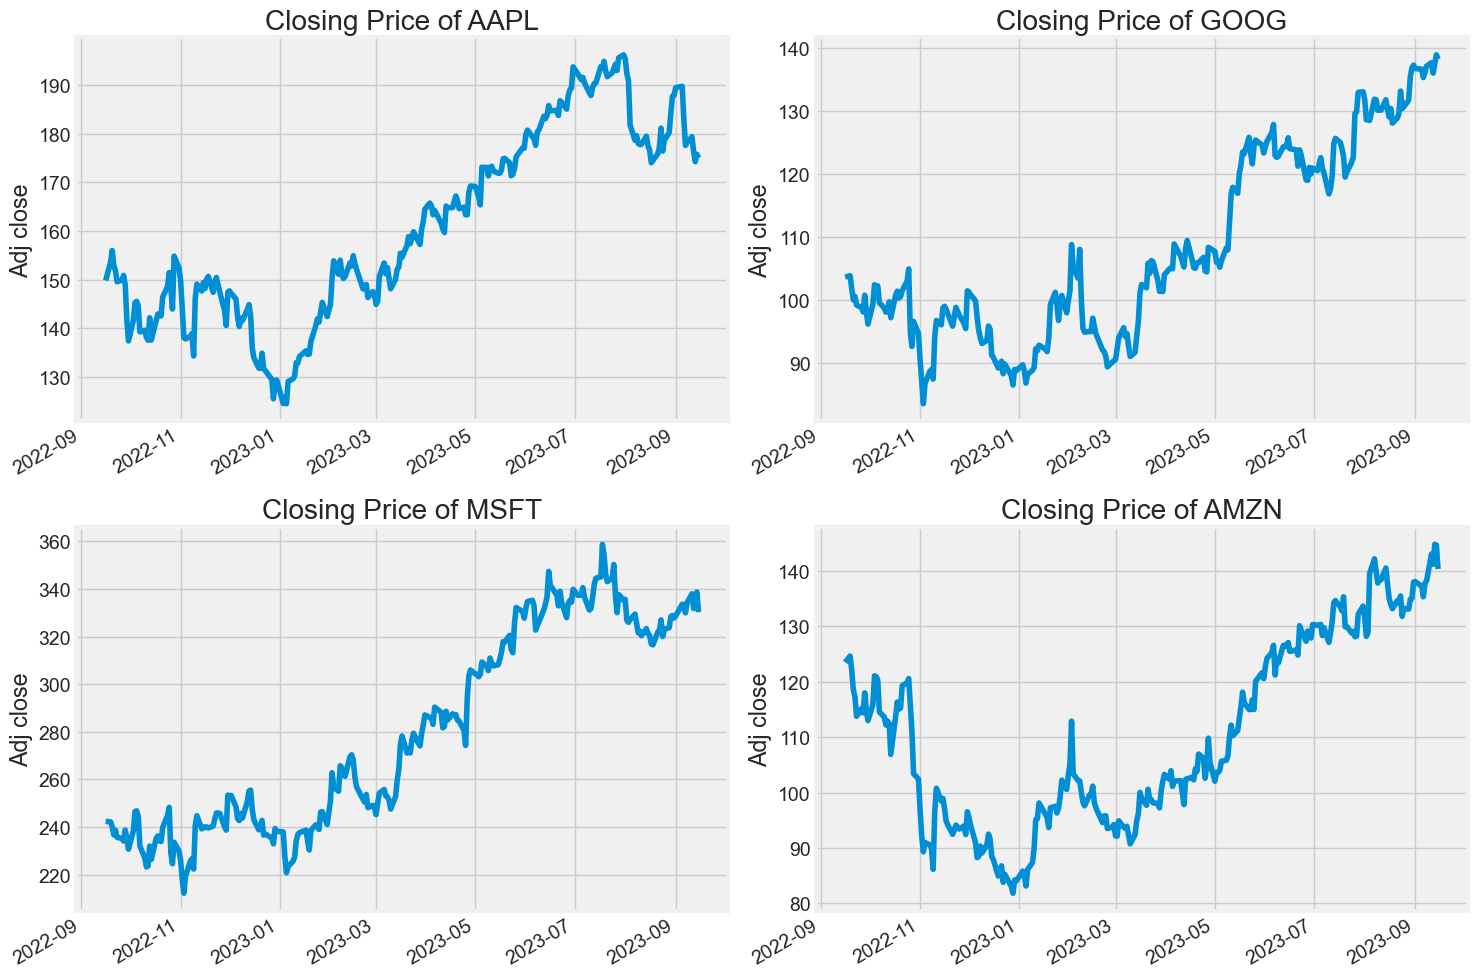

In [5]:
#Historical view of the closing price

plt.figure(figsize=(15,10),facecolor="white")
plt.style.use("fivethirtyeight")
plt.subplots_adjust(top=1.25, bottom=1.2)

for i , company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company["Adj Close"].plot()
    plt.ylabel("Adj close")
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i-1]}")

plt.tight_layout()


### Volume of Sales

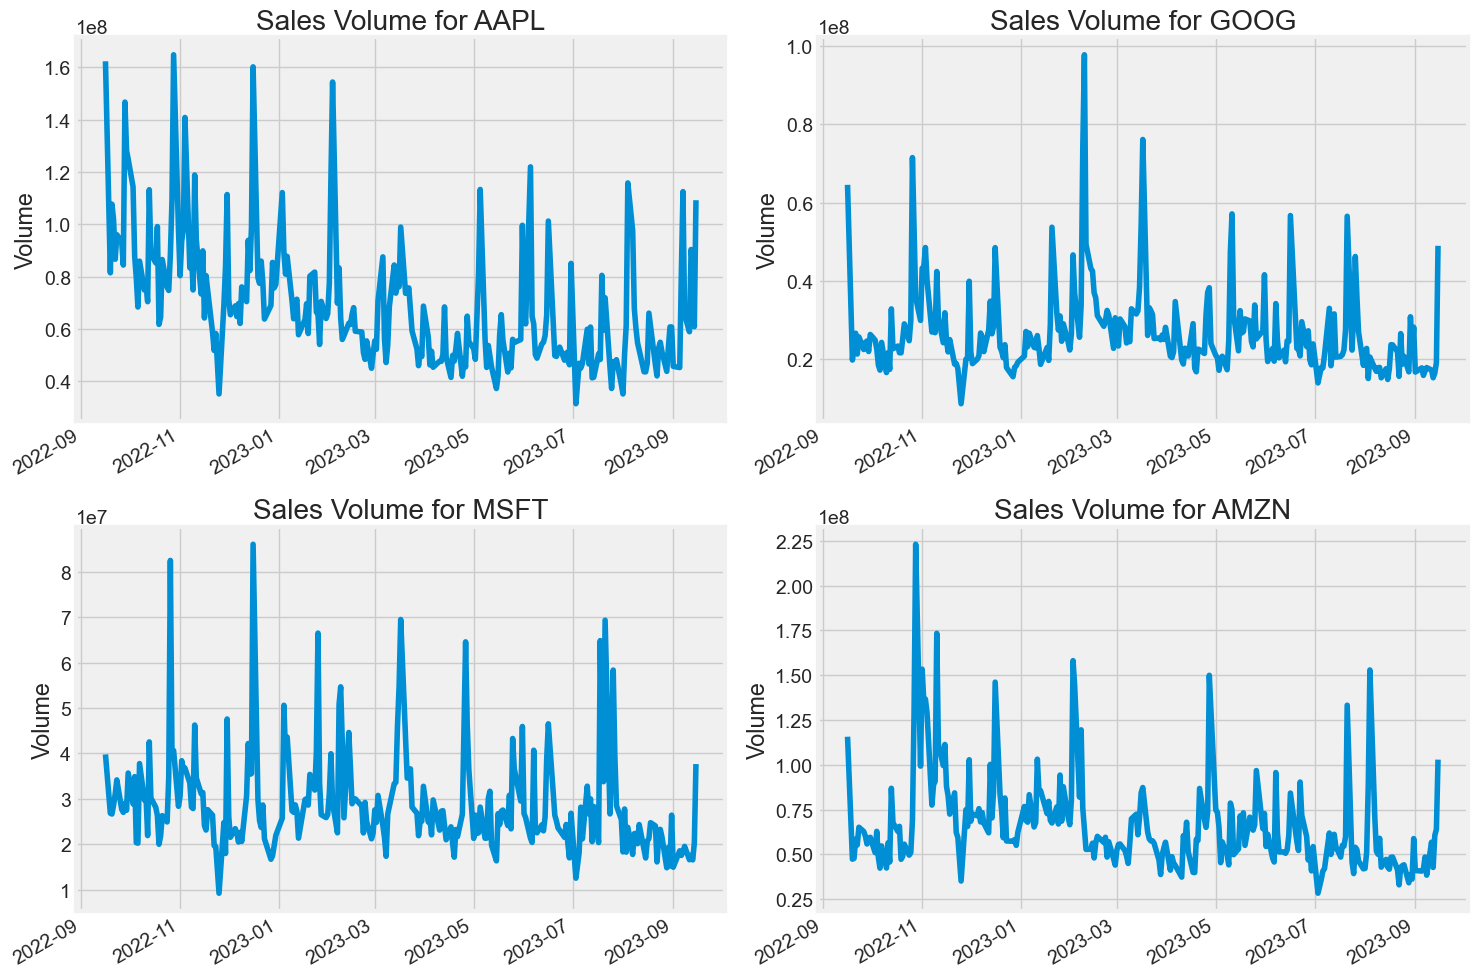

In [6]:
#Calculating total volume of stock being traded each day
plt.figure(figsize=(15,10),facecolor="white")
plt.subplots_adjust(top=1.25, bottom=1.2)
plt.style.use("fivethirtyeight")

for i , company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company["Volume"].plot()
    plt.ylabel("Volume")
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i-1]}")
    
plt.tight_layout()

## 2.Analysis of Moving Average of various stocks

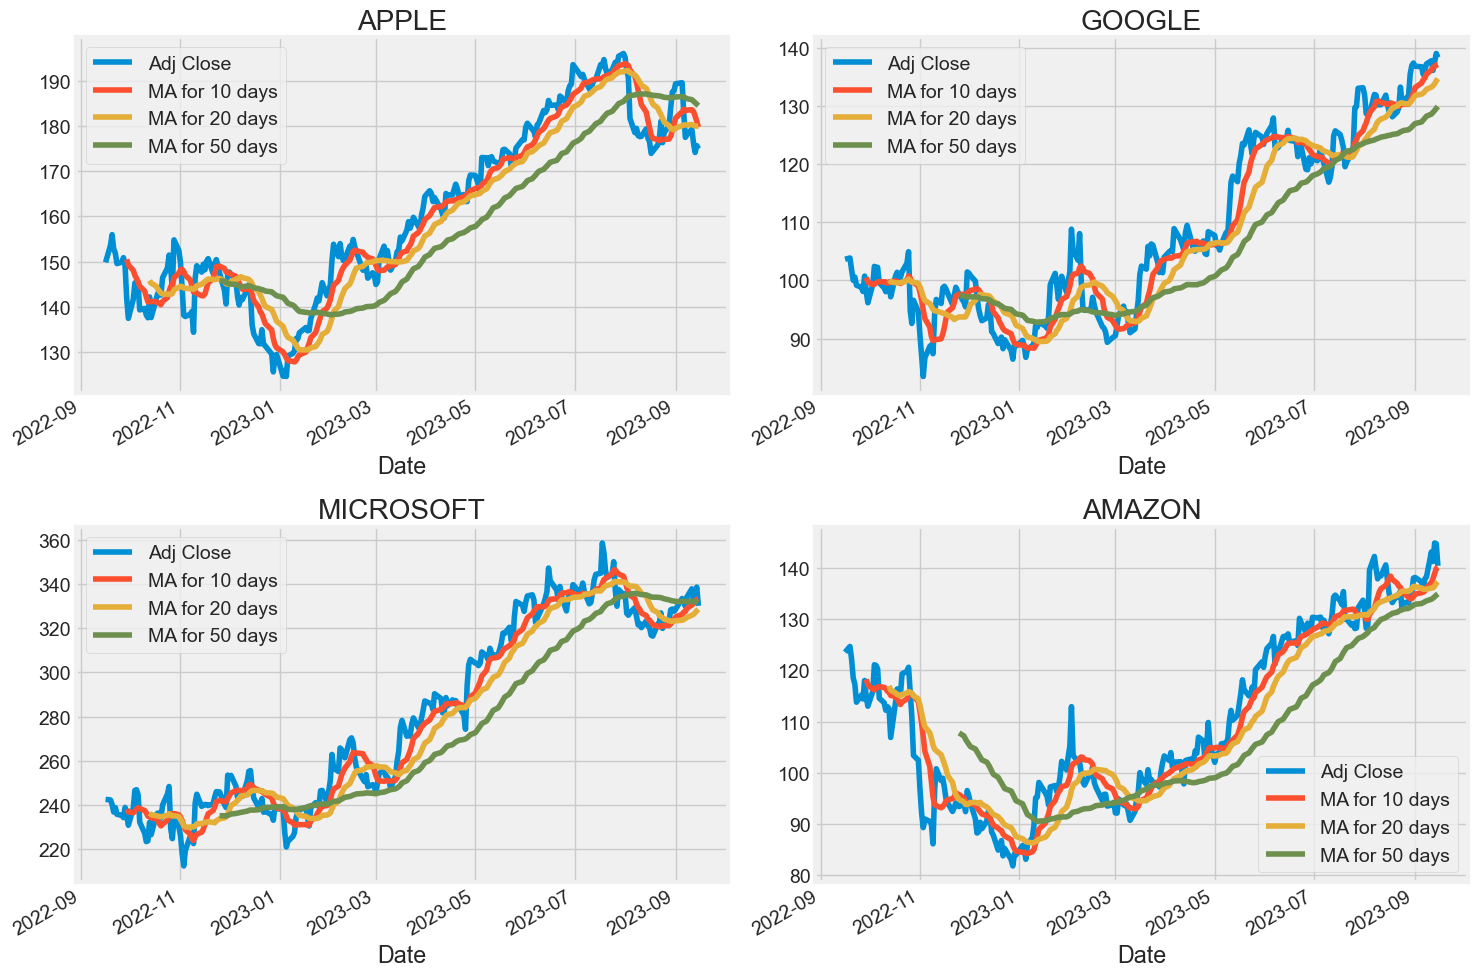

In [7]:
#Plotting moving average of stocks over 10,20,50 days
ma_day = [10,20,50]
for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company["Adj Close"].rolling(ma).mean()
        
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
plt.style.use("fivethirtyeight")
fig.patch.set_facecolor('white')

AAPL[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(ax=axes[0,0])
axes[0,0].set_title("APPLE")

GOOG[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(ax=axes[0,1])
axes[0,1].set_title("GOOGLE")

MSFT[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(ax=axes[1,0])
axes[1,0].set_title("MICROSOFT")

AMZN[["Adj Close","MA for 10 days","MA for 20 days","MA for 50 days"]].plot(ax=axes[1,1])
axes[1,1].set_title("AMAZON")


plt.tight_layout()

## 3.Daily Return of stock on average

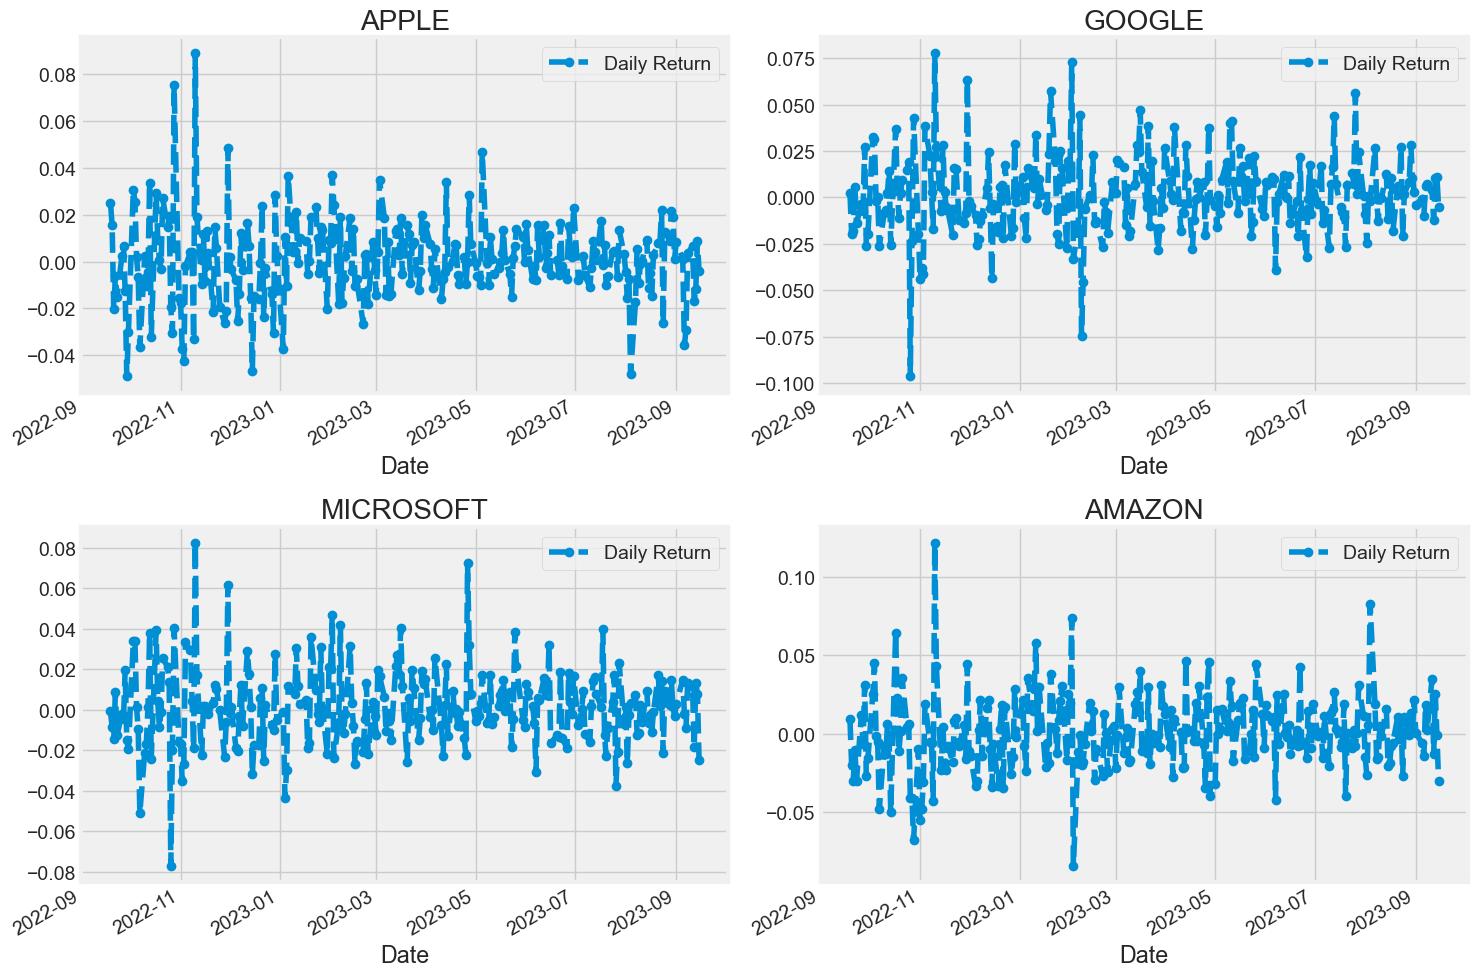

In [8]:
for company in company_list:
    company["Daily Return"] = company["Adj Close"].pct_change()
    
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
fig.patch.set_facecolor('white')


AAPL["Daily Return"].plot(ax = axes[0,0], legend=True, linestyle="--",marker="o")
axes[0,0].set_title("APPLE")

GOOG["Daily Return"].plot(ax = axes[0,1], legend=True, linestyle="--",marker="o")
axes[0,1].set_title("GOOGLE")

MSFT["Daily Return"].plot(ax = axes[1,0], legend=True, linestyle="--",marker="o")
axes[1,0].set_title("MICROSOFT")

AMZN["Daily Return"].plot(ax = axes[1,1], legend=True, linestyle="--",marker="o")
axes[1,1].set_title("AMAZON")

fig.tight_layout()

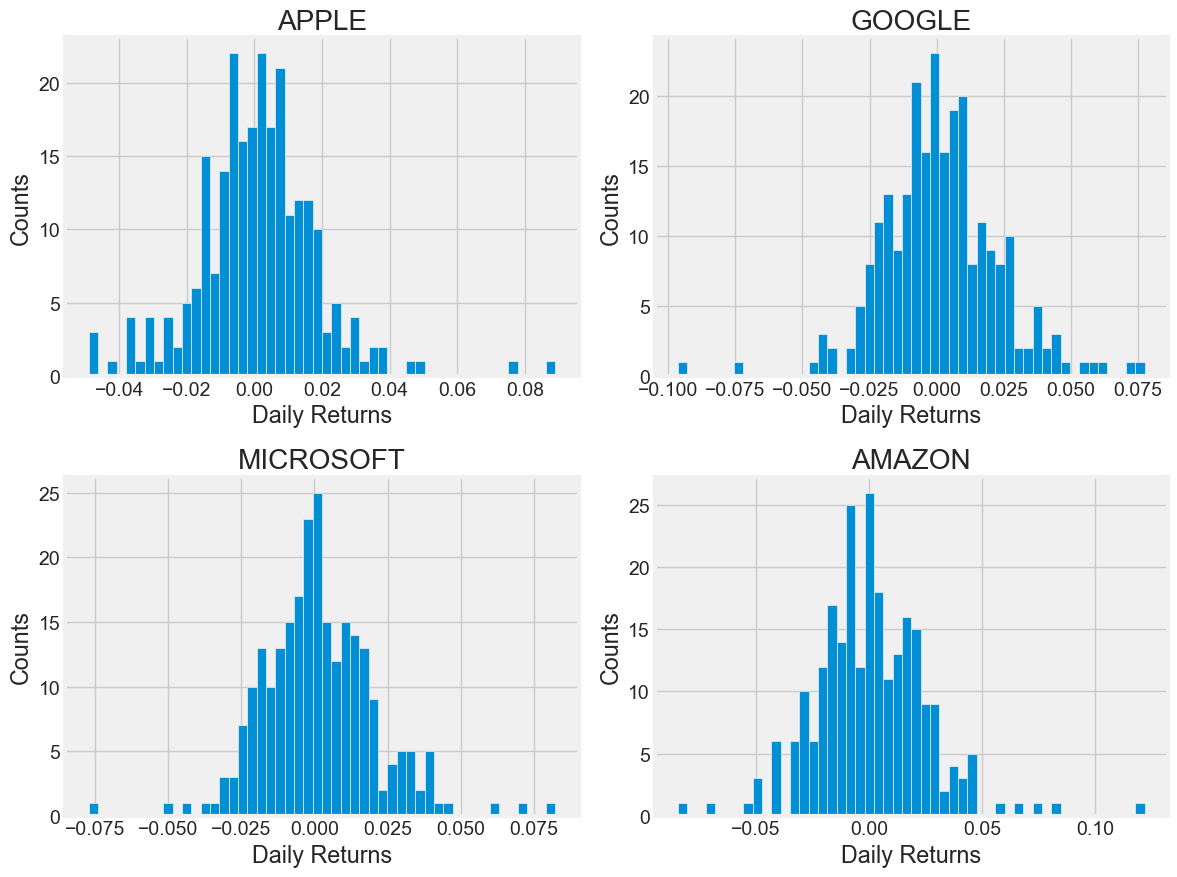

In [9]:
plt.figure(figsize=(12,9),facecolor="white")

for i,company in enumerate(company_list,1):
    plt.subplot(2,2,i)
    company["Daily Return"].hist(bins=50)
    plt.xlabel("Daily Returns")
    plt.ylabel("Counts")
    plt.title(f"{company_name[i-1]}")
    
plt.tight_layout()

## 4.Correlation between different stock's closing price

In [10]:
closing_df = pdr.get_data_yahoo(tech_list,start=start,end=end)["Adj Close"]
returns = closing_df.pct_change()
returns.head()

[*********************100%%**********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-09-16,NaN,NaN,NaN,NaN
2022-09-19,0.025083,0.009148,0.002123,-0.000899
2022-09-20,0.015666,-0.019814,-0.019451,-0.008466
2022-09-21,-0.020268,-0.029872,-0.017873,-0.014436
2022-09-22,-0.006375,-0.010376,0.005599,0.008495


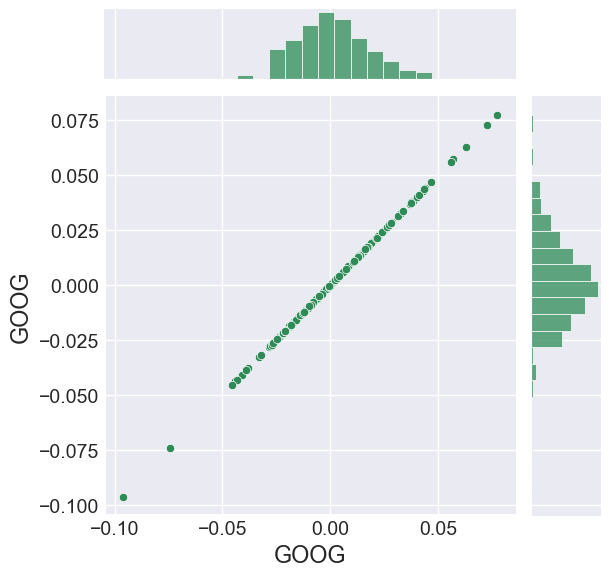

In [11]:
#Comparing Google's stock to itself
sns.set_style("darkgrid")
sns.jointplot(data=returns,x="GOOG",y="GOOG",kind="scatter",color="seagreen",height=6)


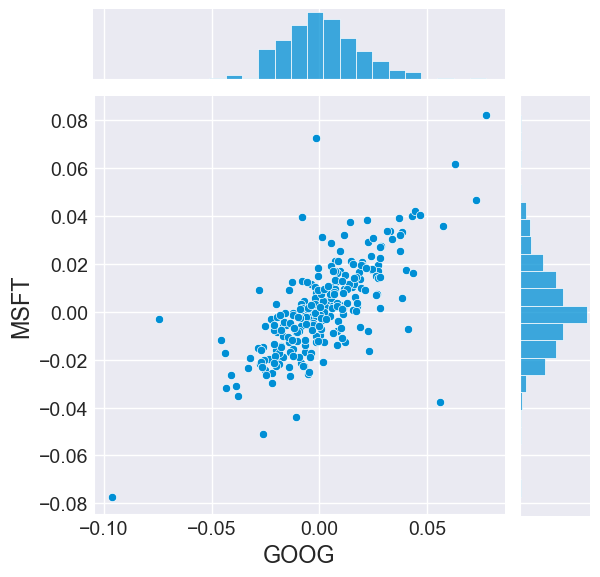

In [12]:
sns.jointplot(data=returns,x="GOOG",y="MSFT",kind="scatter")

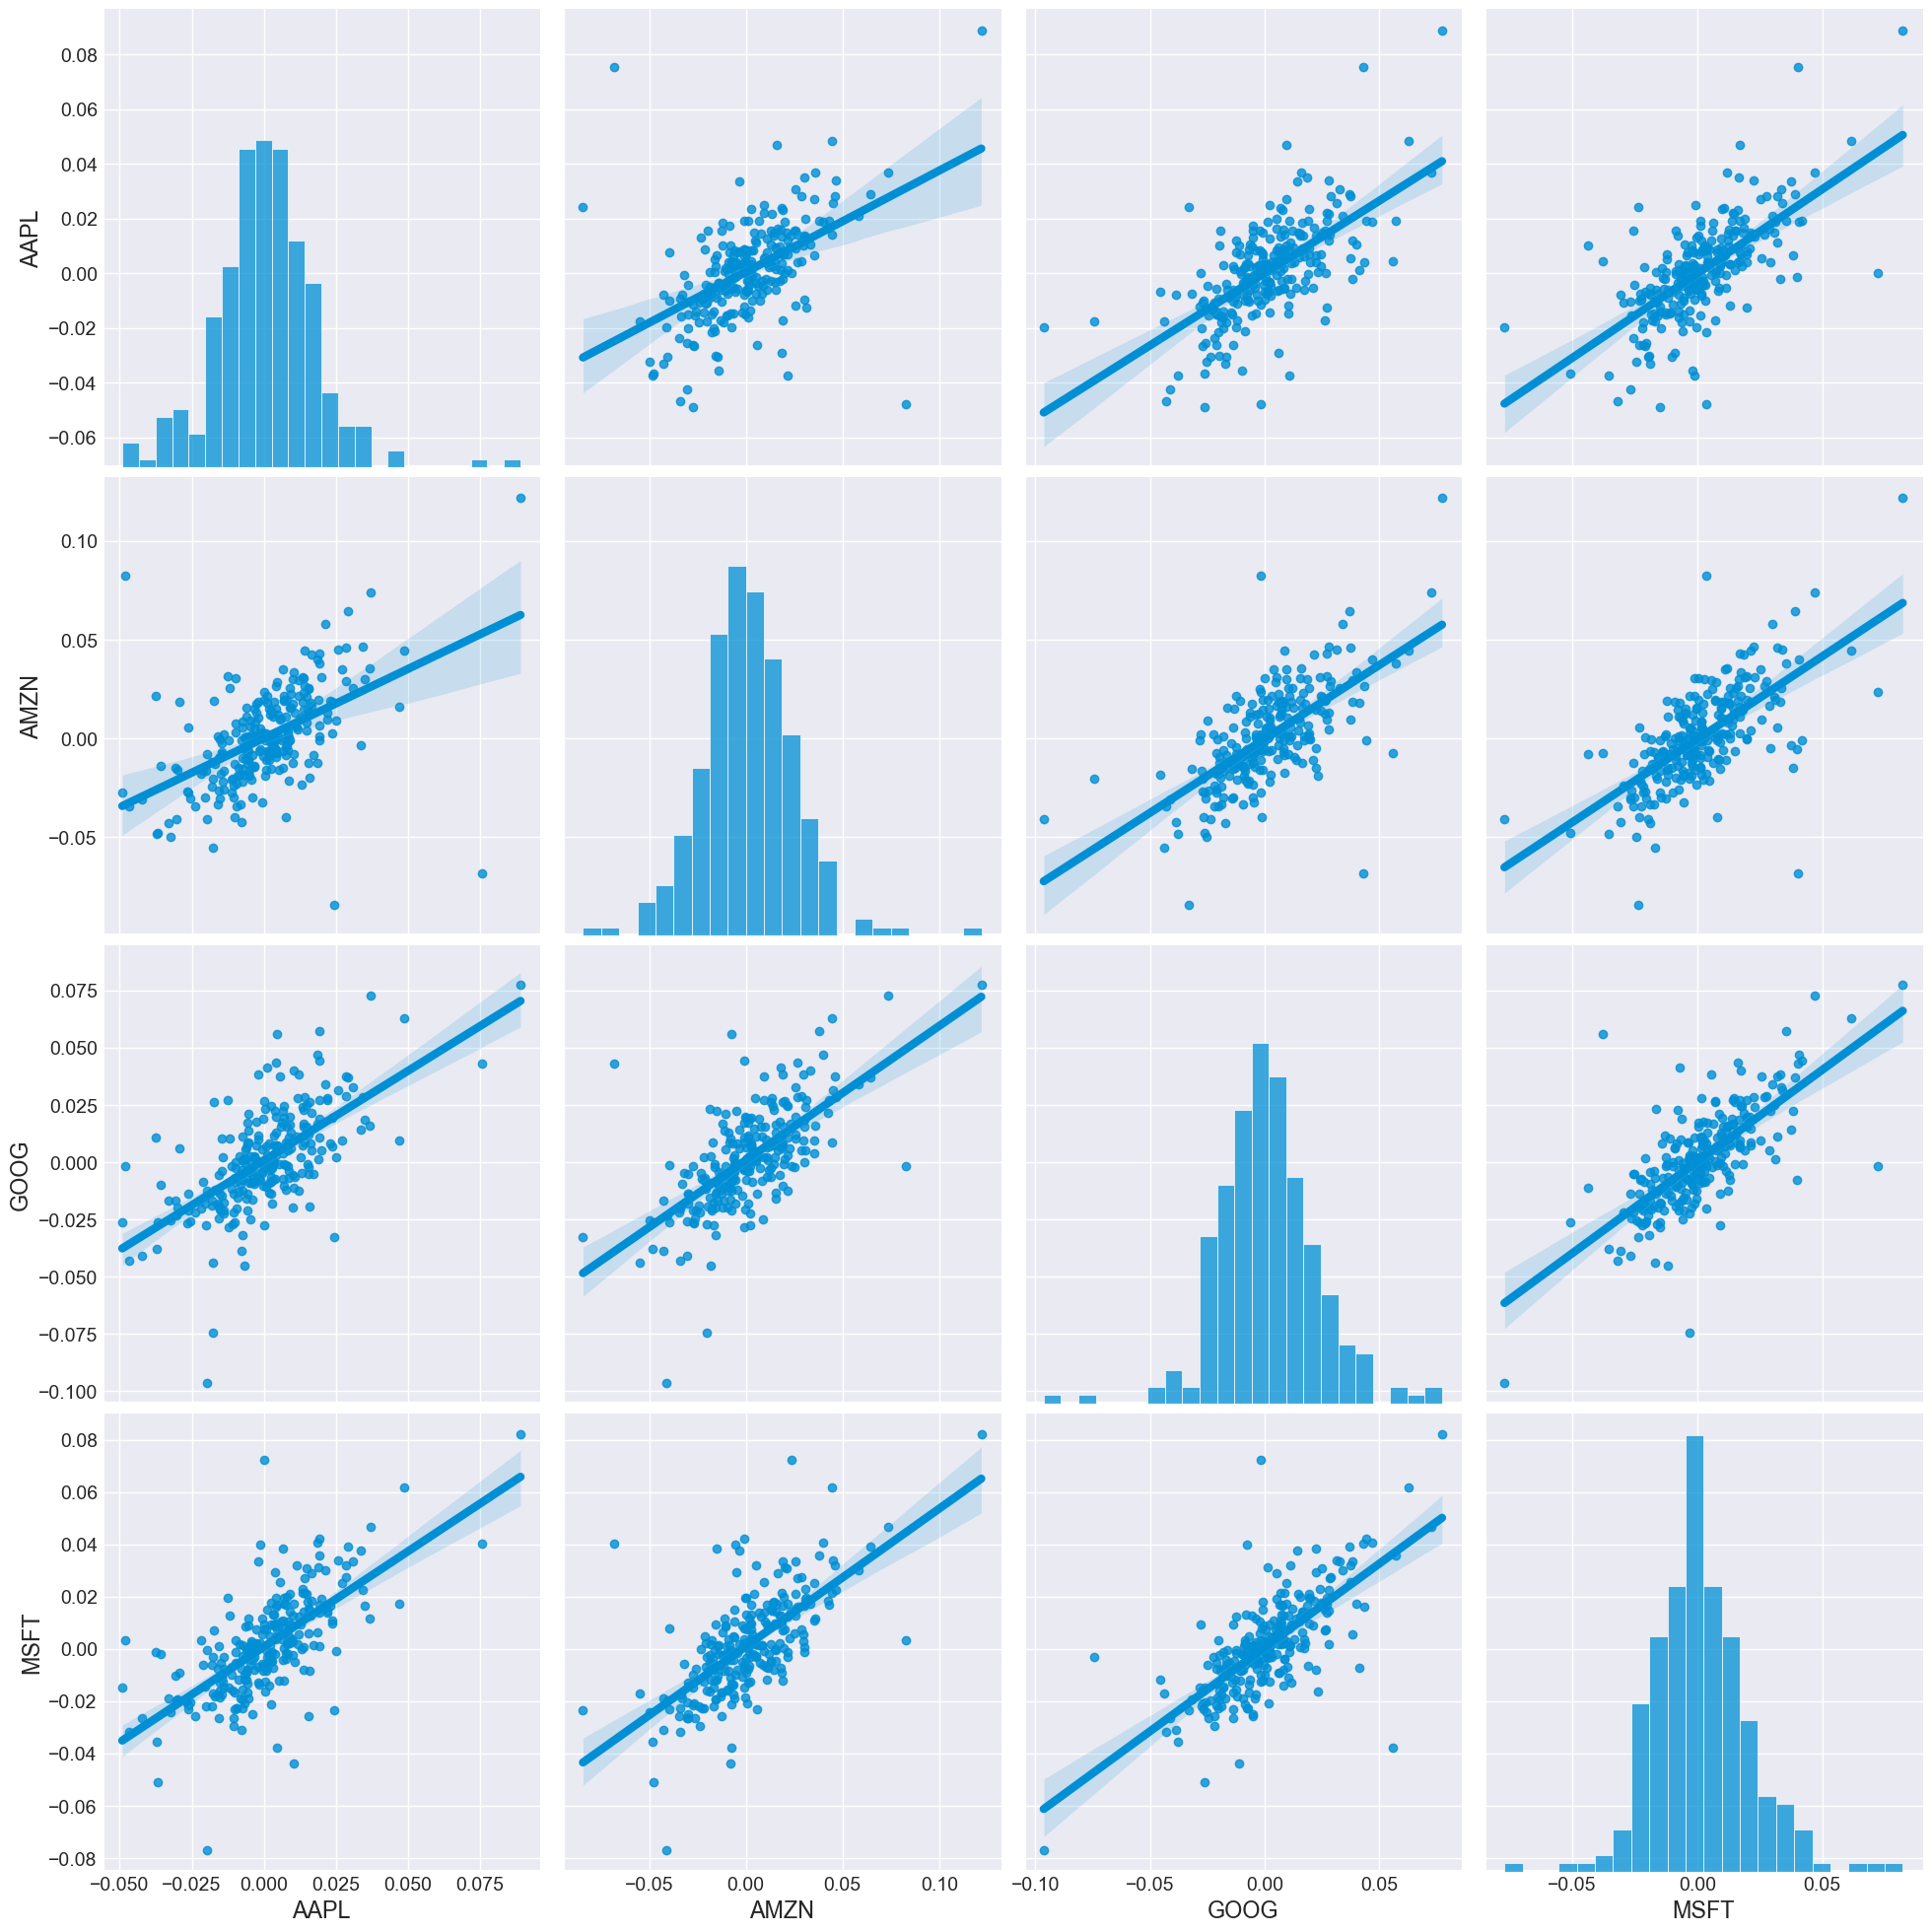

In [13]:
sns.pairplot(returns, kind="reg",height=5)

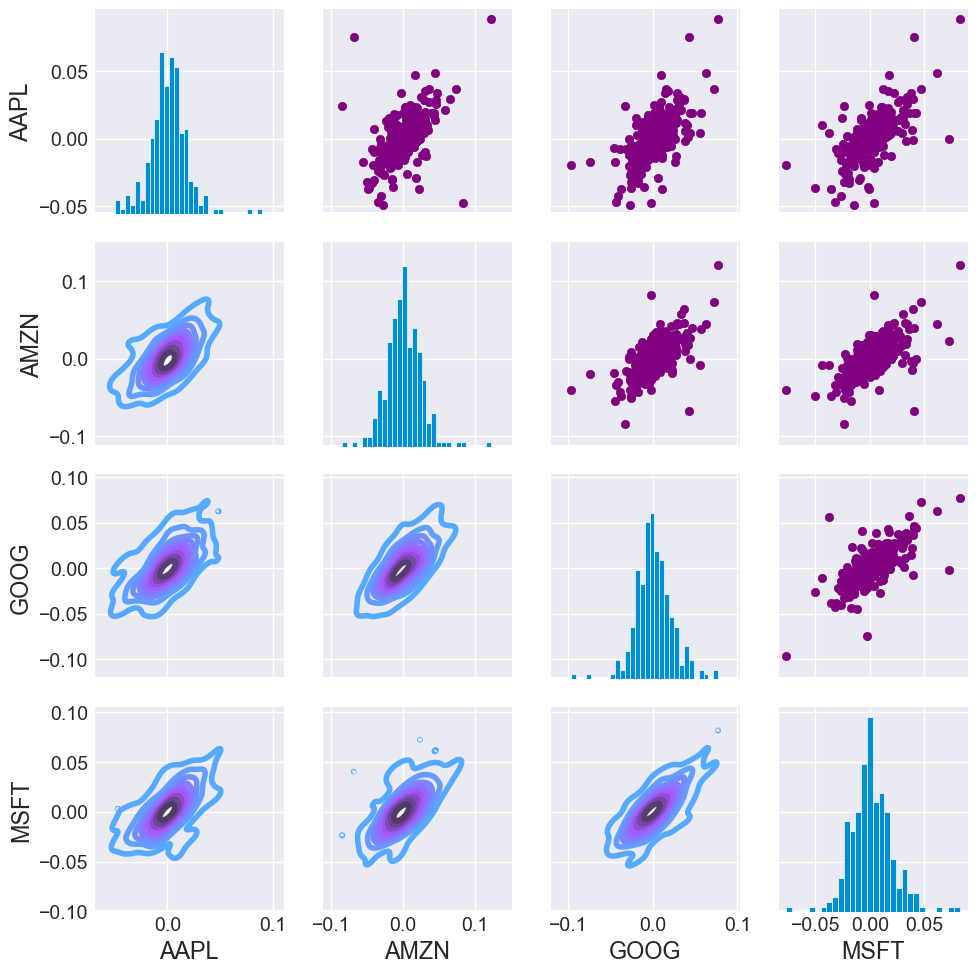

In [14]:
grid = sns.PairGrid(returns.dropna())
grid.map_upper(plt.scatter,color="purple")
grid.map_lower(sns.kdeplot,cmap="cool_d")
grid.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of Stock Closing Price')

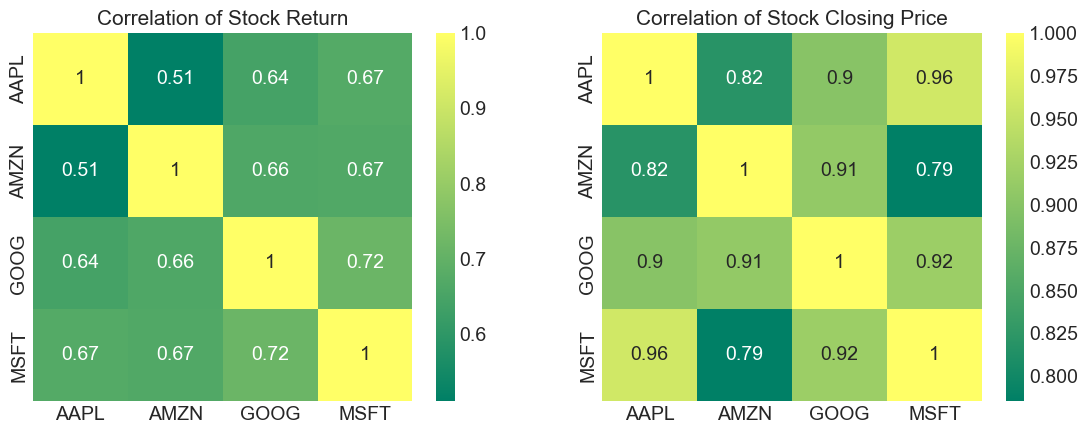

In [15]:
#Finding correlation of stock return;stock closing price
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.heatmap(returns.corr(),cmap="summer",annot=True)
plt.title("Correlation of Stock Return",fontsize=15)

plt.subplot(2,2,2)
sns.heatmap(closing_df.corr(),cmap="summer",annot=True)
plt.title("Correlation of Stock Closing Price",fontsize=15)

## 5.How much value is at risk by investing in a particular stock?

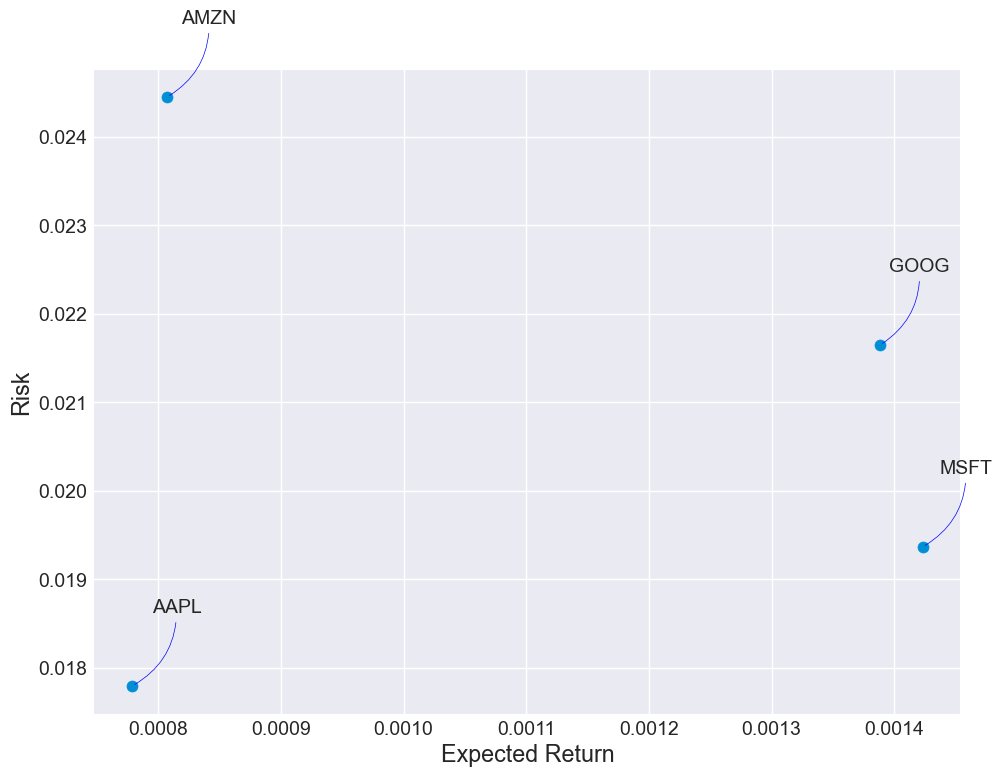

In [16]:
rets = returns.dropna()
area = np.pi*20
plt.figure(figsize=(10,8))
plt.scatter(rets.mean(), rets.std(), s = area)
plt.xlabel("Expected Return")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y),xytext=(50,50), textcoords = "offset points",
        ha="right",va="bottom",
        arrowprops=dict(arrowstyle="-",color="blue",connectionstyle="arc3,rad=-0.3"))